In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
SuperStoreOrders = pd.read_csv('./StoreOrders.csv') 
df = SuperStoreOrders.copy()
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,51290.0,3.476545,2.278766,1.000,2.00,3.00,5.00,14.000
discount,51290.0,0.142908,0.212280,0.000,0.00,0.00,0.20,0.850
profit,51290.0,28.641740,174.424113,-6599.978,0.00,9.24,36.81,8399.976
shipping_cost,51290.0,26.375915,57.296804,0.000,2.61,7.79,24.45,933.570
year,51290.0,2012.777208,1.098931,2011.000,2012.00,2013.00,2014.00,2014.000


In [19]:
df.shape

(51290, 21)

In [20]:
#is there null or mask : df.isna().sum()[df.isna().sum()>0]
df.isna().sum()


order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [21]:
df.nunique()

order_id          25035
order_date         1430
ship_date          1464
ship_mode             4
customer_name       795
segment               3
state              1094
country             147
market                7
region               13
product_id        10292
category              3
sub_category         17
product_name       3788
sales              2246
quantity             14
discount             27
profit            24575
shipping_cost     10037
order_priority        4
year                  4
dtype: int64

### Data Cleaning

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

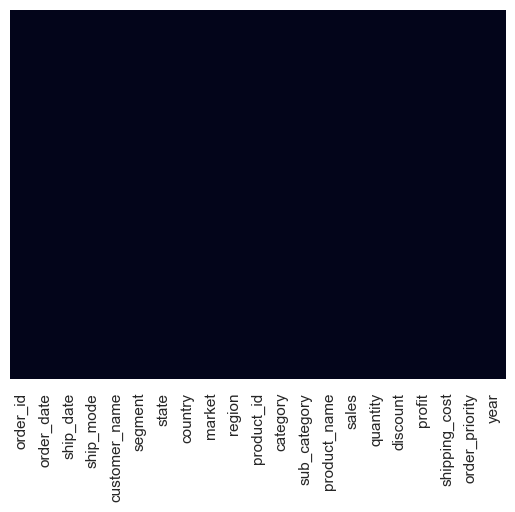

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False);

#no null in the data

In [24]:
df.describe()

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


## Top 10 Consumer Countries

In [25]:
# Number of Countries or use df['country'].count()
df['country']

0              Algeria
1            Australia
2              Hungary
3               Sweden
4            Australia
             ...      
51285    United States
51286          Morocco
51287        Nicaragua
51288           Mexico
51289    United States
Name: country, Length: 51290, dtype: object

In [26]:
df["country"].value_counts()[0:10]

United States     9994
Australia         2837
France            2827
Mexico            2644
Germany           2065
China             1880
United Kingdom    1633
Brazil            1599
India             1555
Indonesia         1390
Name: country, dtype: int64

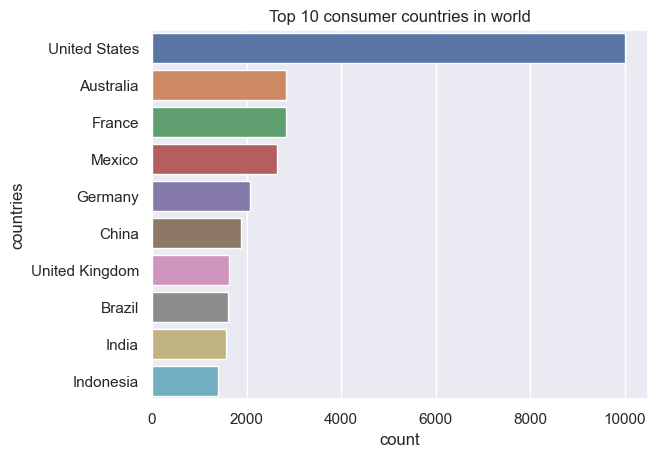

In [27]:
L1=["United States","Australia","France","Mexico","Germany","China","United Kingdom","Brazil","India","Indonesia"]
L2=[9994,2837,2827,2644,2065,1880,1633,1599,1555,1390]
sns.barplot(x=L2,y=L1)
sns.set_theme(style="darkgrid")
plt.title("Top 10 consumer countries in world")
plt.xlabel("count")
plt.ylabel("countries");

In [28]:
#
df.groupby(['country','region'])['profit'].max()

country      region        
Afghanistan  Central Asia      848.7000
Albania      EMEA              258.9000
Algeria      Africa            560.5200
Angola       Africa            592.2000
Argentina    South              68.2360
                                 ...   
Venezuela    South              32.6600
Vietnam      Southeast Asia    836.1225
Yemen        EMEA               -5.0520
Zambia       Africa            959.2200
Zimbabwe     Africa             -0.9210
Name: profit, Length: 152, dtype: float64

In [29]:
df.groupby(['country','region'])['sales'].min()

country      region        
Afghanistan  Central Asia      1,168
Albania      EMEA              1,619
Algeria      Africa            1,008
Angola       Africa            1,467
Argentina    South             1,002
                               ...  
Venezuela    South             1,054
Vietnam      Southeast Asia    1,003
Yemen        EMEA                 12
Zambia       Africa            1,023
Zimbabwe     Africa                1
Name: sales, Length: 152, dtype: object

In [36]:
#US is the largest consumer in world
Store_US=df[df["country"]=="United States"]
Store_Aus=df[df["country"]=="Australia"]
Store_FR=df[df["country"]=="France"]
Store_Mex=df[df["country"]=="Mexico"]
Store_Ger=df[df["country"]=="Germany"]
Store_Chi=df[df["country"]=="China"]
Store_UK=df[df["country"]=="United Kingdom"]
Store_Braz=df[df["country"]=="Brazil"]
Store_Ind=df[df["country"]=="India"]
Store_Indo=df[df["country"]=="Indonesia"]

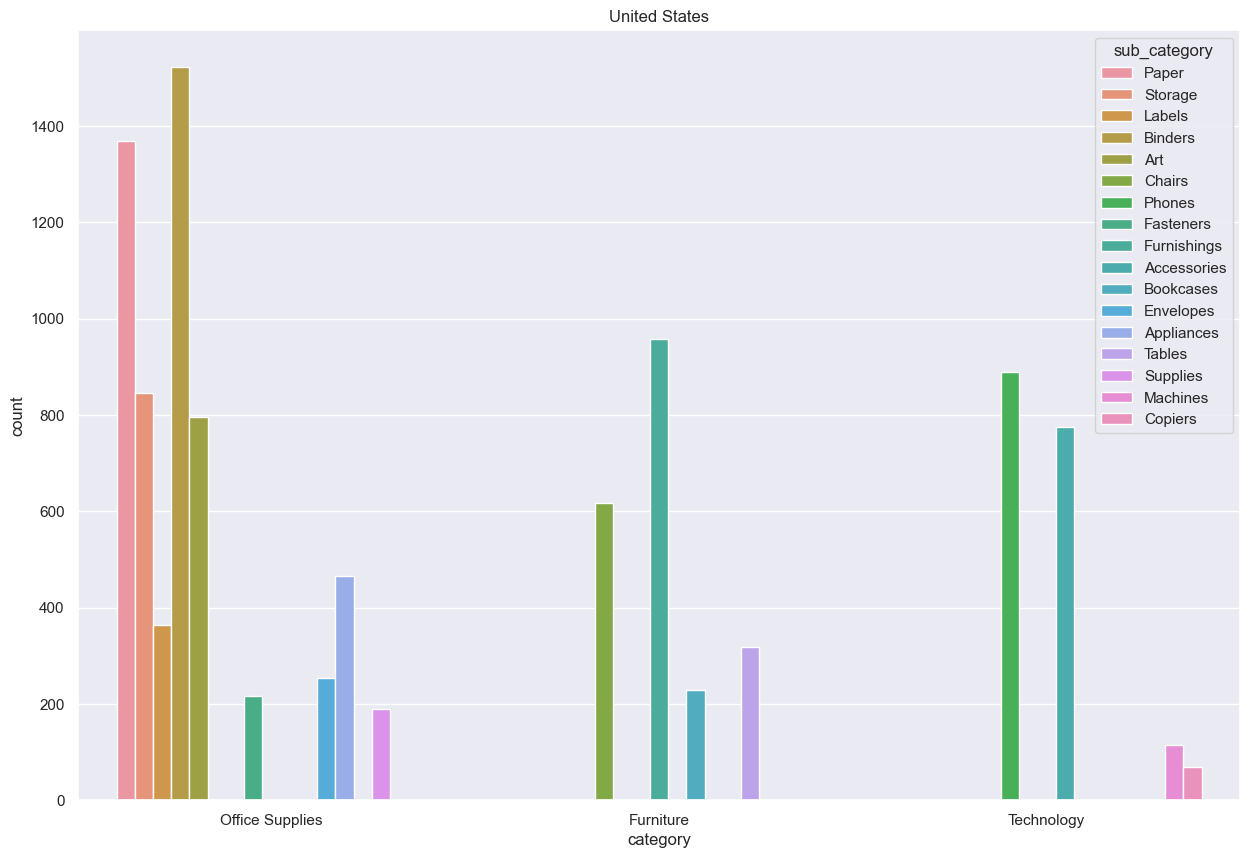

In [41]:
#Products by Categories consumed by Top 10 countries
plt.figure(figsize=(15,10))
plt.title("United States")
sns.set_theme(style="darkgrid")
sns.countplot(x=Store_US["category"],hue=Store_US["sub_category"]);

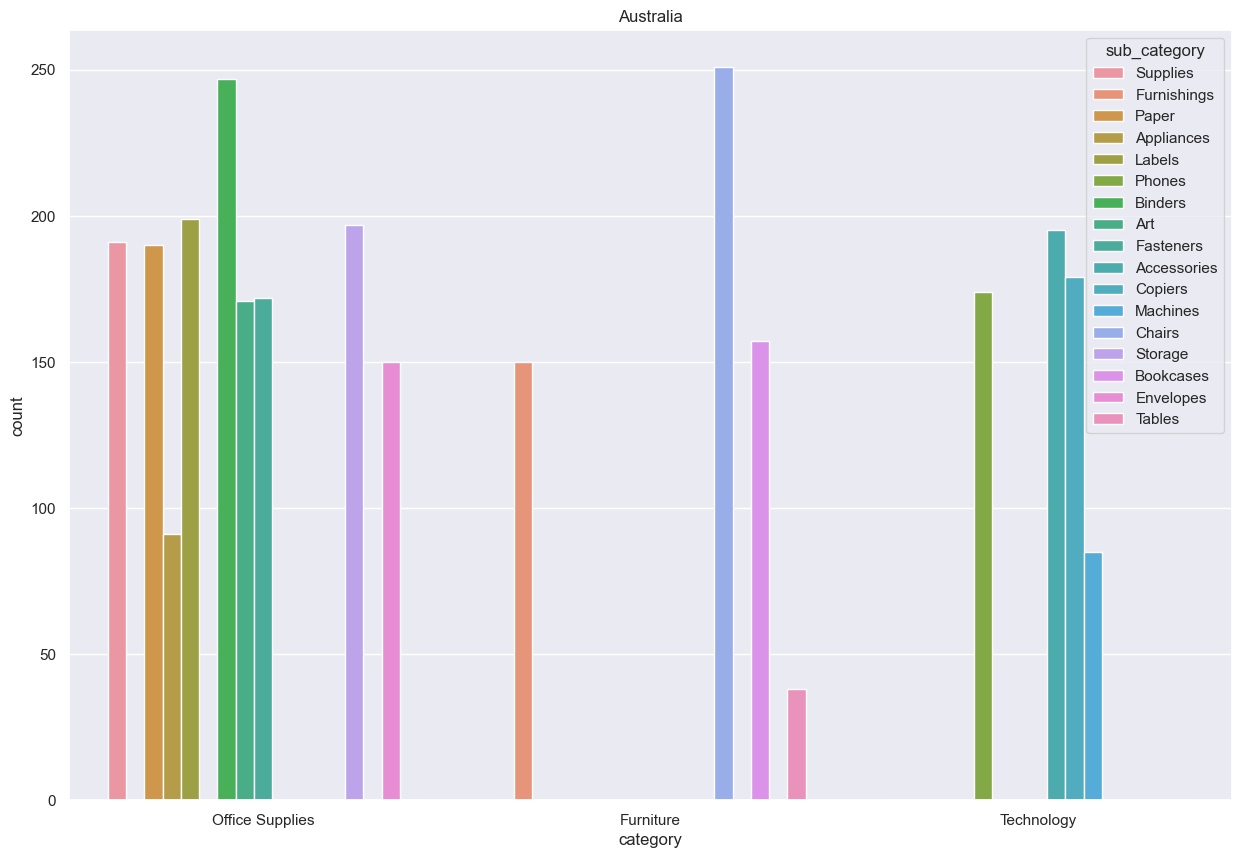

In [48]:
plt.figure(figsize=(15,10))
plt.title("Australia")
sns.set_theme(style="darkgrid")
sns.countplot(x=Store_Aus["category"],hue=Store_Aus["sub_category"]);

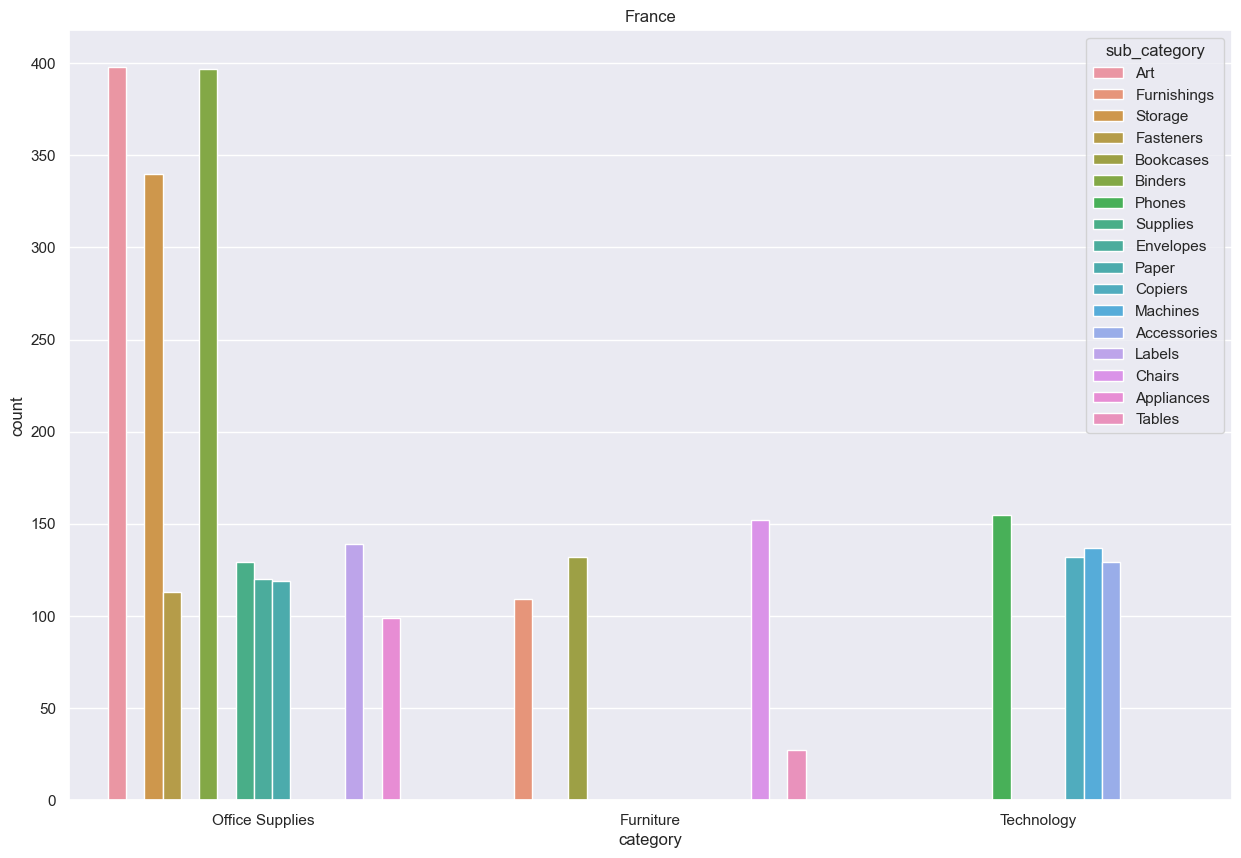

In [43]:
plt.figure(figsize=(15,10))
plt.title("France")
sns.set_theme(style="darkgrid")
sns.countplot(x=Store_FR["category"],hue=Store_FR["sub_category"]);


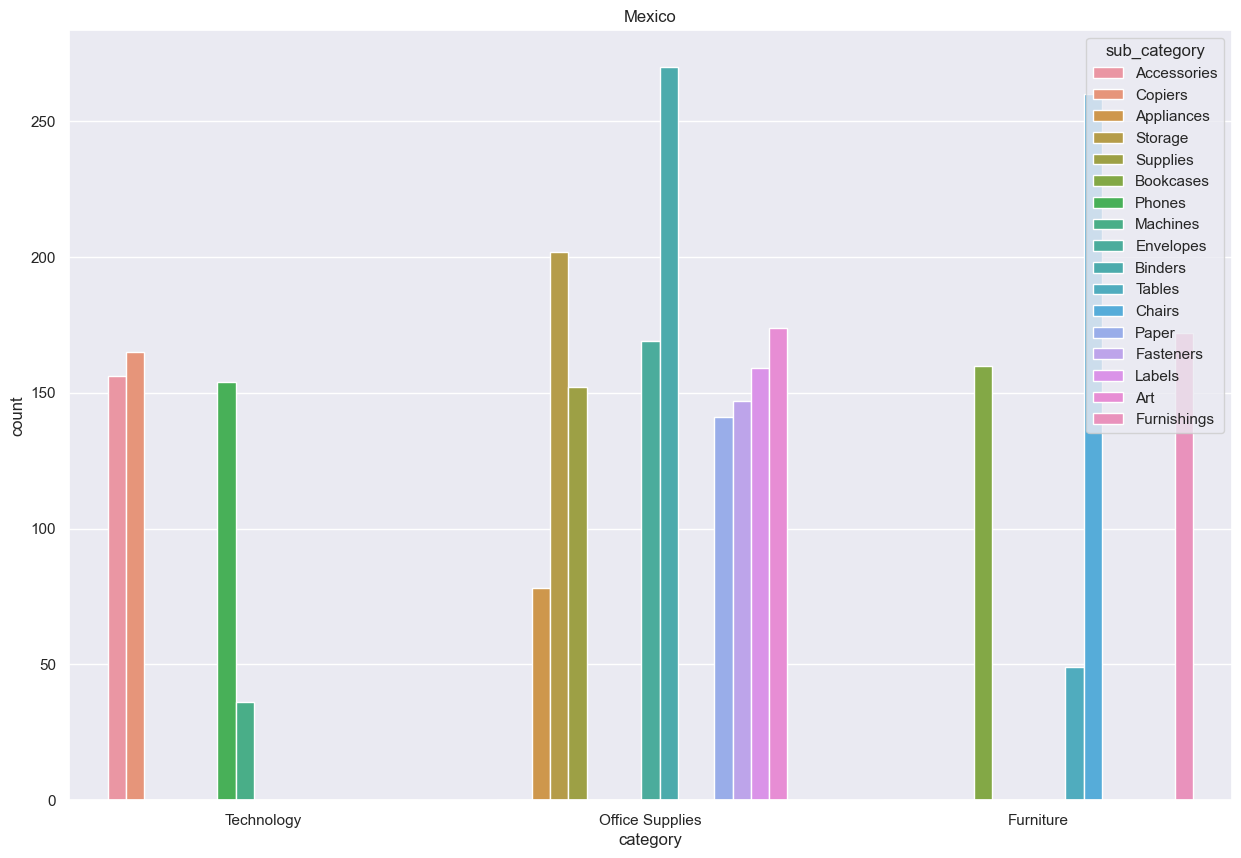

In [42]:
plt.figure(figsize=(15,10))
plt.title("Mexico")
sns.set_theme(style="darkgrid")
sns.countplot(x=Store_Mex["category"],hue=Store_Mex["sub_category"]);

In [30]:
df['year'].nunique()

4

In [31]:
df['country'].nunique()

147

In [32]:
df['product_name'].nunique()

3788

In [34]:
df['product_name'].type

AttributeError: 'Series' object has no attribute 'type'

In [ ]:
df.sort_values('profit',ascending=False)

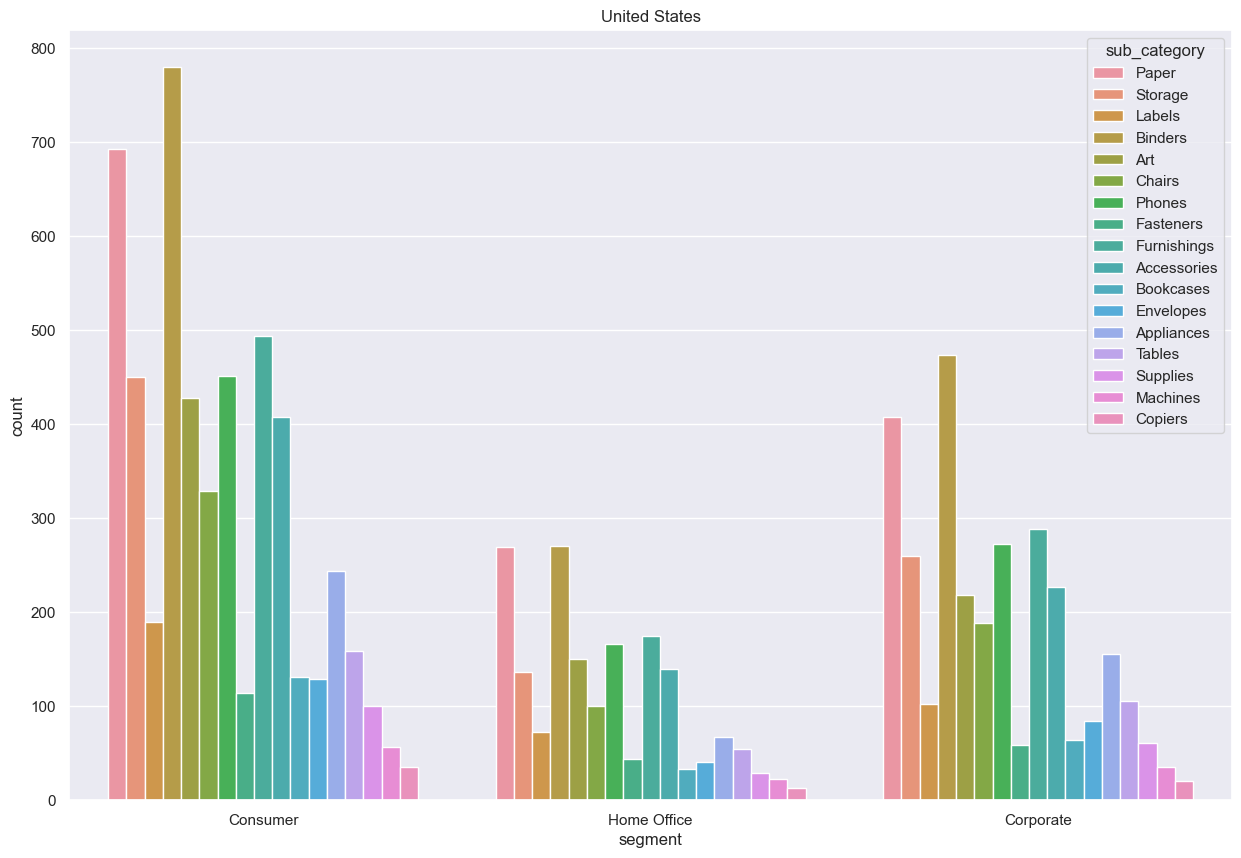

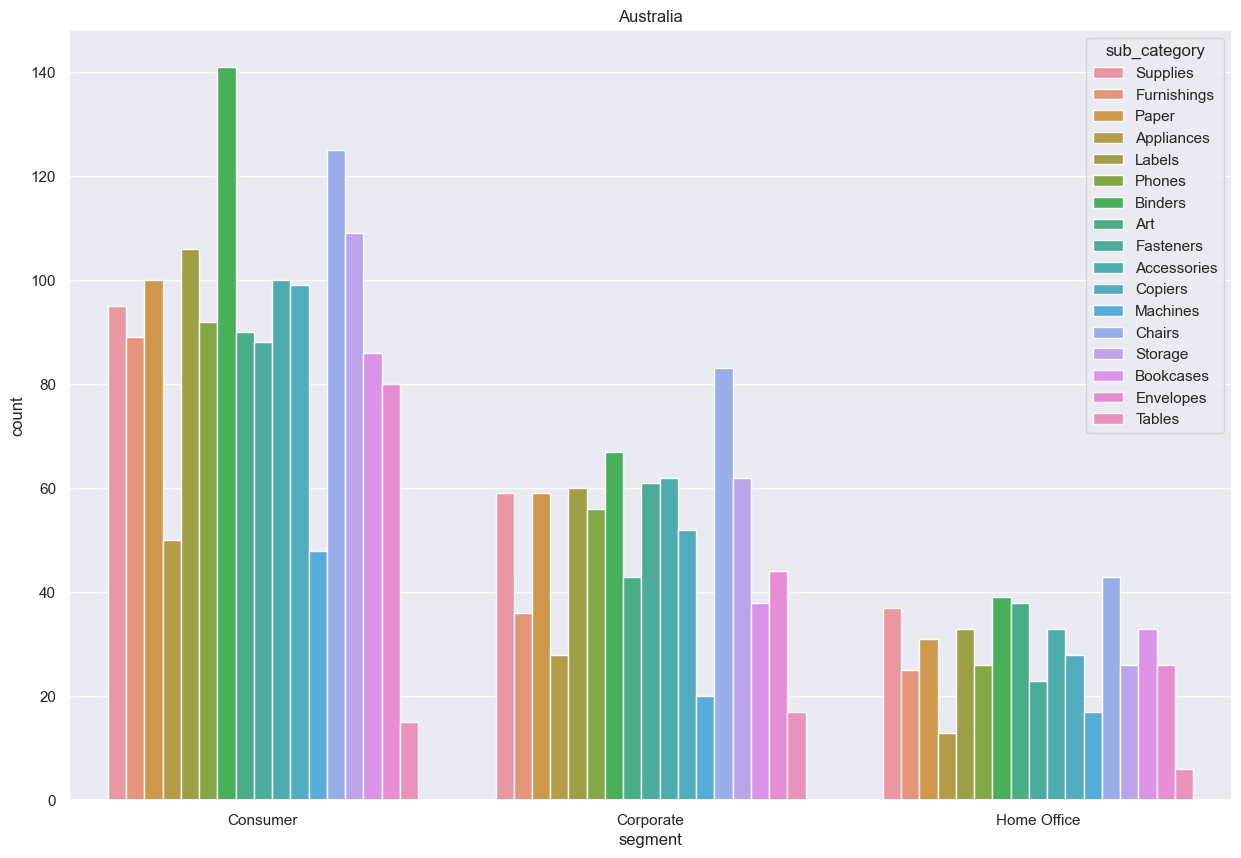

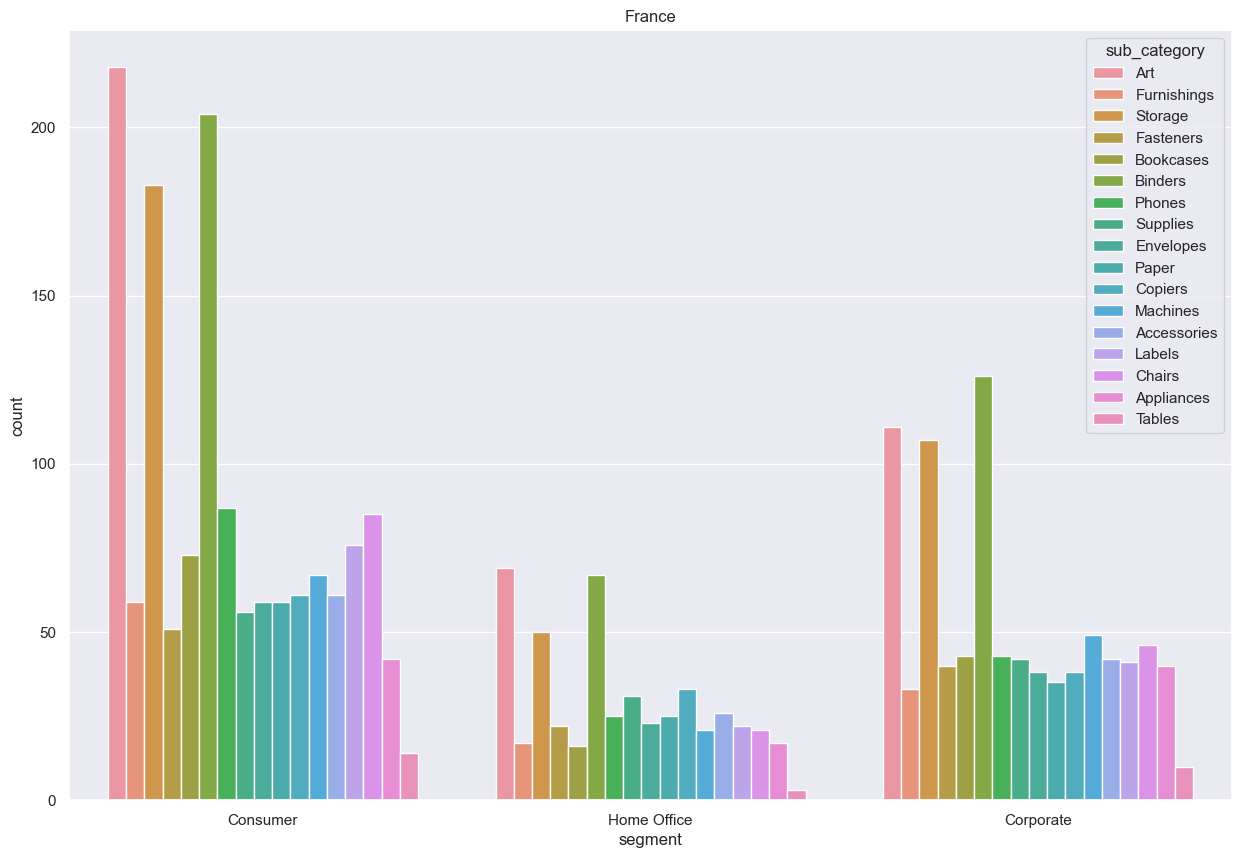

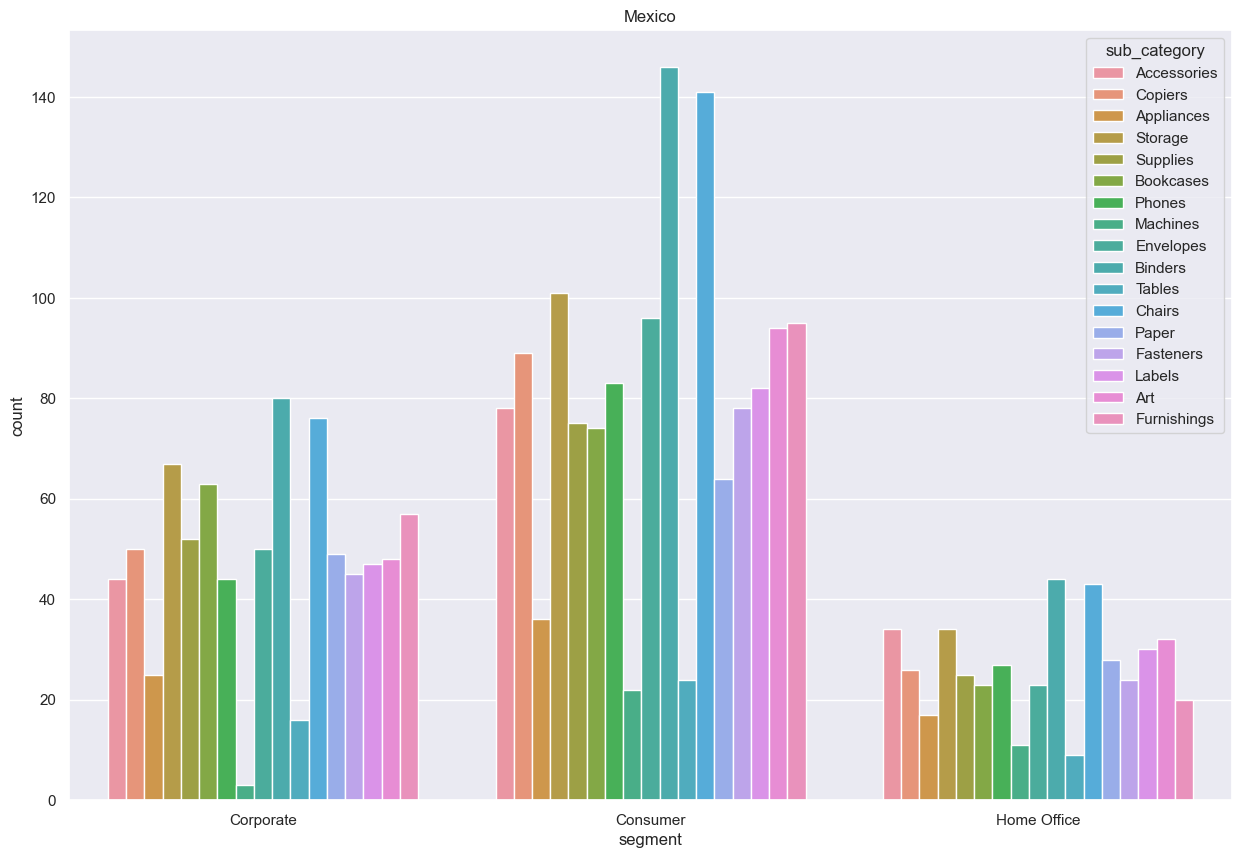

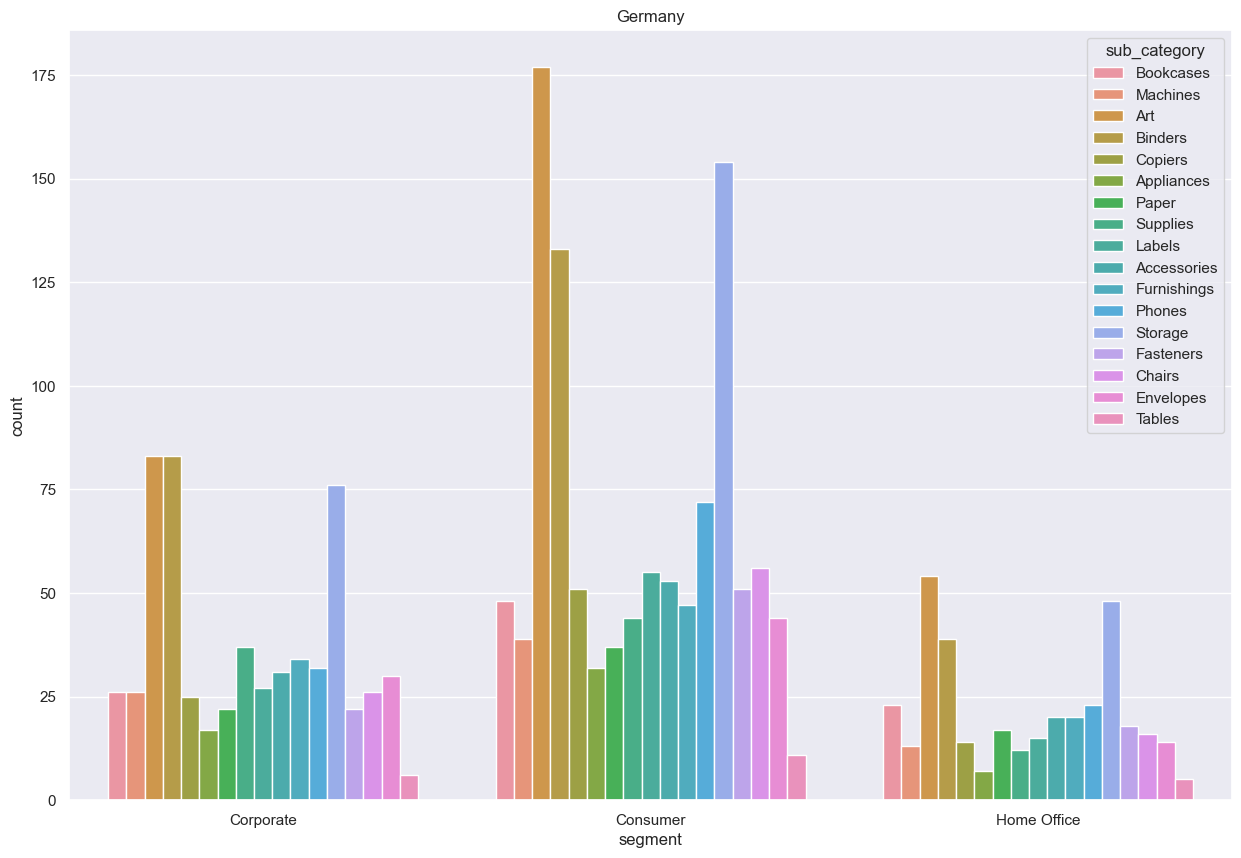

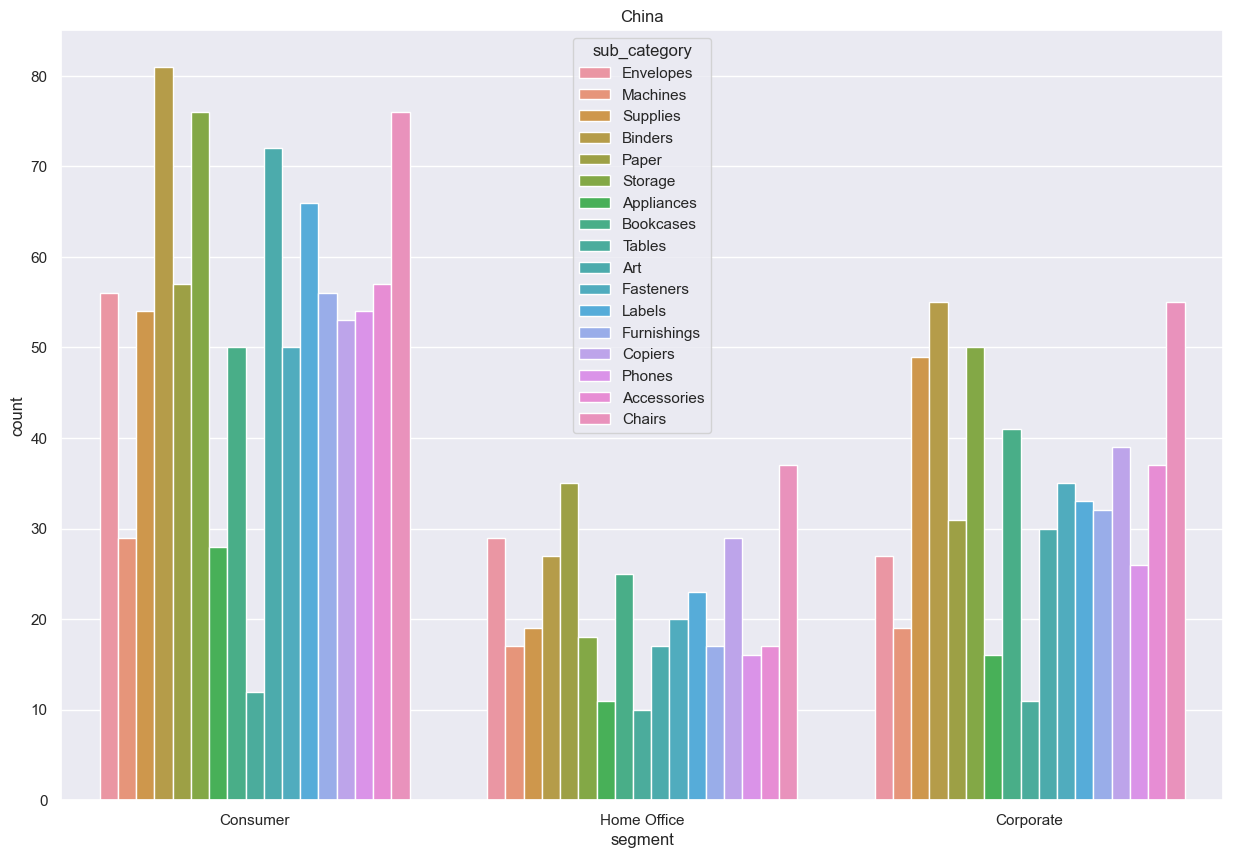

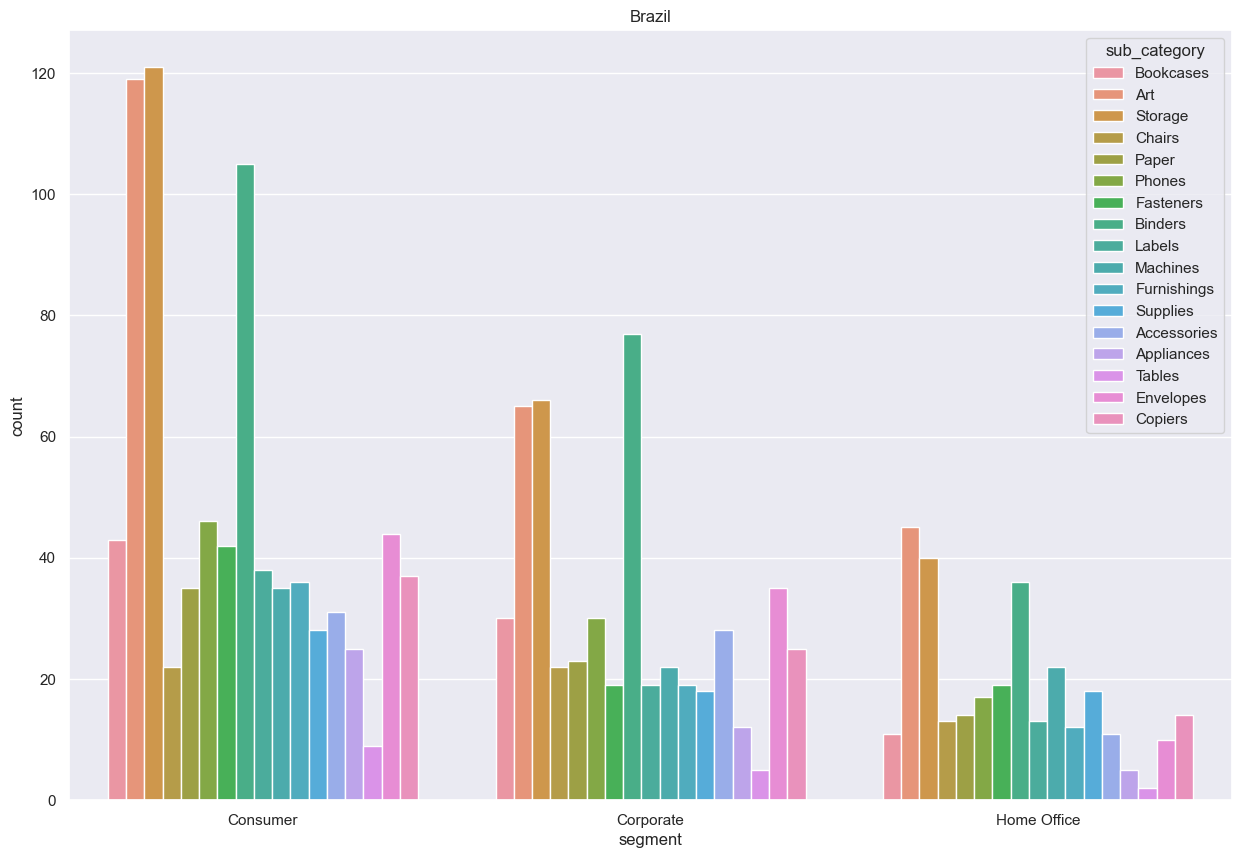

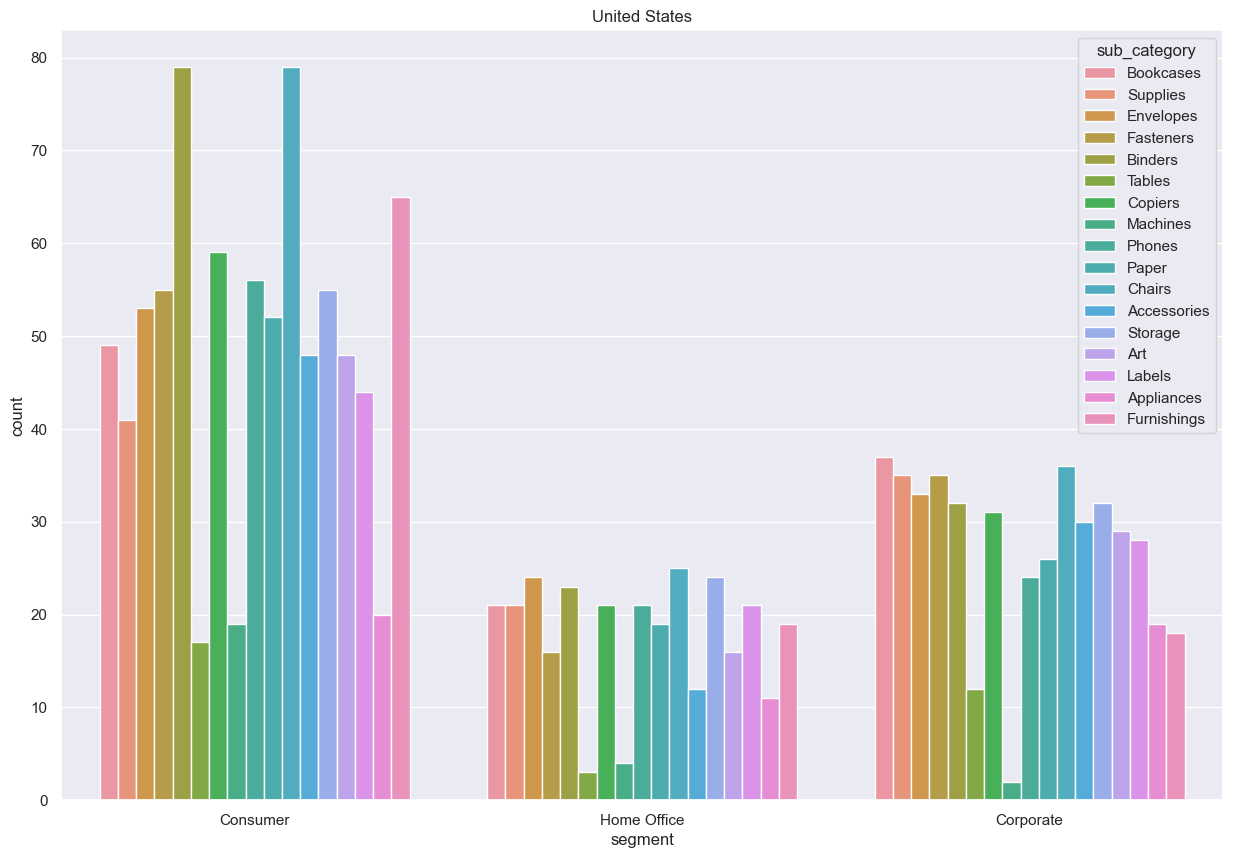

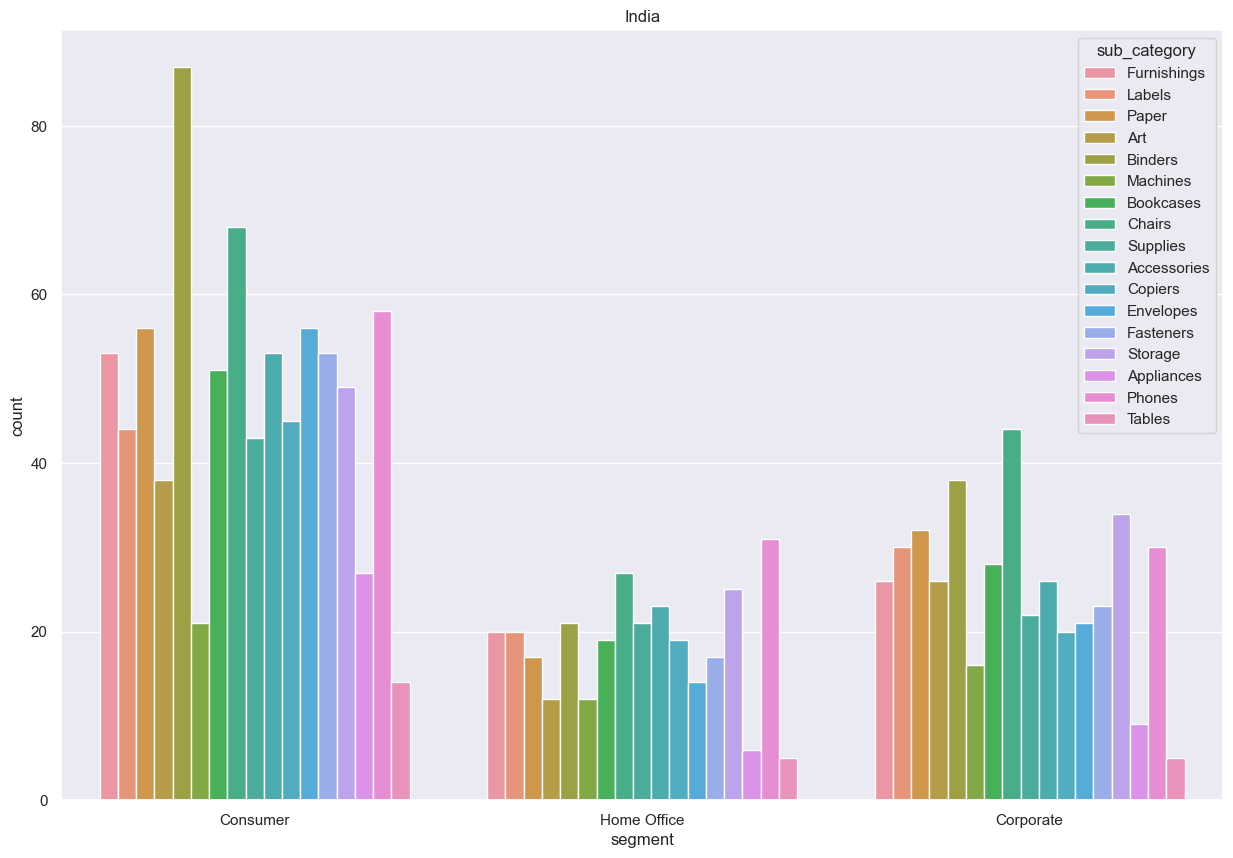

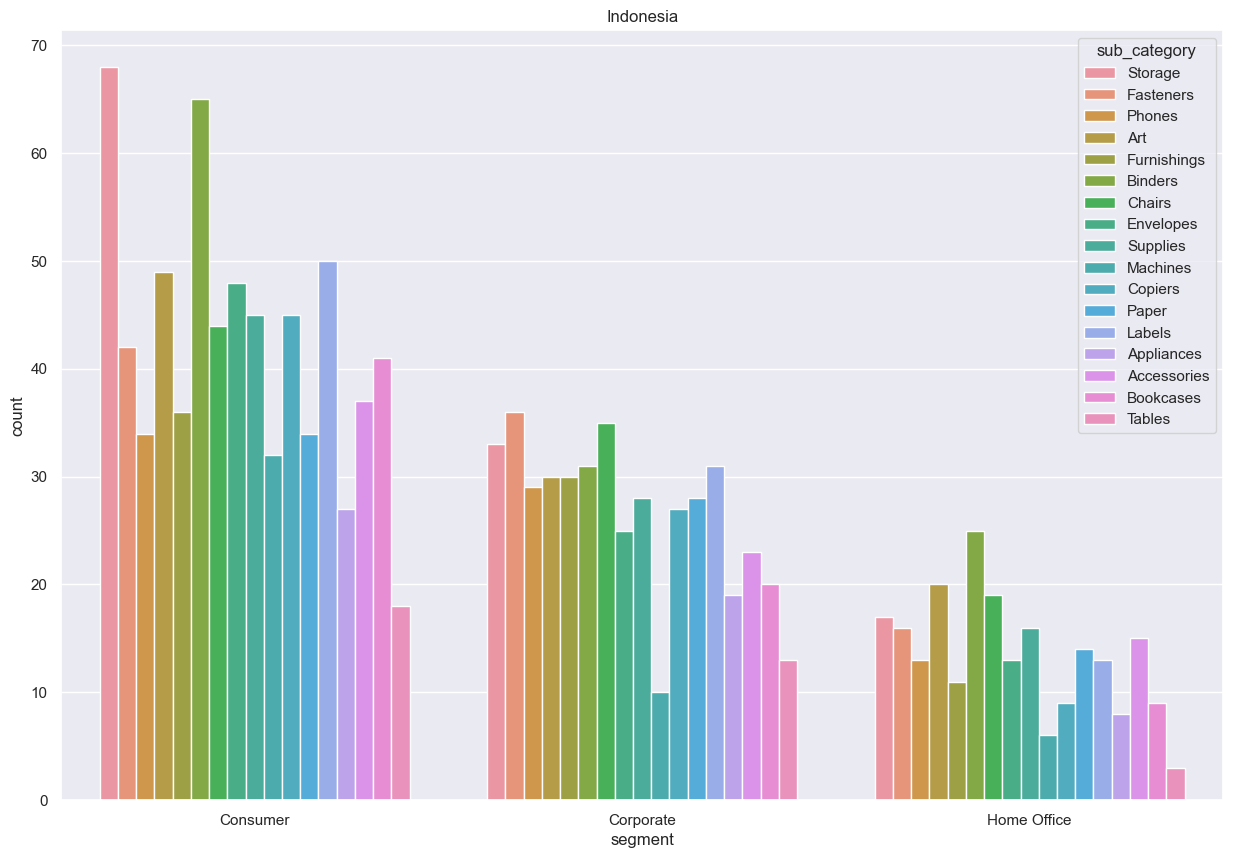

In [39]:
#Products by Categories consumed by Top 10 countries
plt.figure(figsize=(15,10))
plt.title("United States")
sns.set_theme(style="darkgrid")
sns.countplot(x=Store_US["segment"],hue=Store_US["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("Australia")
sns.set_theme(style="darkgrid")
sns.countplot(x=Store_Aus["segment"],hue=Store_Aus["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("France")
sns.set_theme(style="darkgrid")
sns.countplot(x=Store_FR["segment"],hue=Store_FR["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("Mexico")
sns.set_theme(style="darkgrid")
sns.countplot(x=Store_Mex["segment"],hue=Store_Mex["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("Germany")
sns.set_theme(style="darkgrid")
sns.countplot(x=Store_Ger["segment"],hue=Store_Ger["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("China")
sns.set_theme(style="darkgrid")
sns.countplot(x=Store_Chi["segment"],hue=Store_Chi["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("Brazil")
sns.set_theme(style="darkgrid")
sns.countplot(x=Store_UK["segment"],hue=Store_UK["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("United States")
sns.set_theme(style="darkgrid")
sns.countplot(x=Store_Braz["segment"],hue=Store_Braz["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("India")
sns.set_theme(style="darkgrid")
sns.countplot(x=Store_Ind["segment"],hue=Store_Ind["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("Indonesia")
sns.set_theme(style="darkgrid")
sns.countplot(x=Store_Indo["segment"],hue=Store_Indo["sub_category"]);

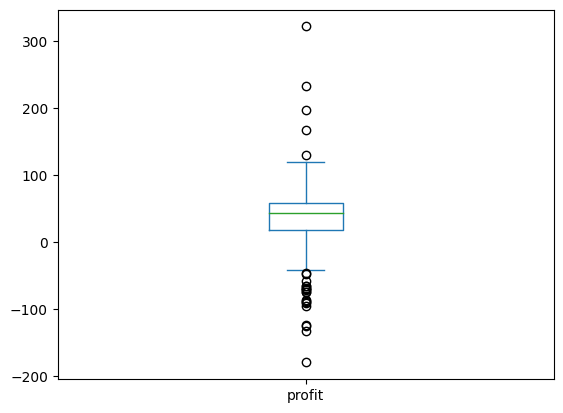

In [87]:
df.groupby(['country','region'])['profit'].mean().plot(kind='box');

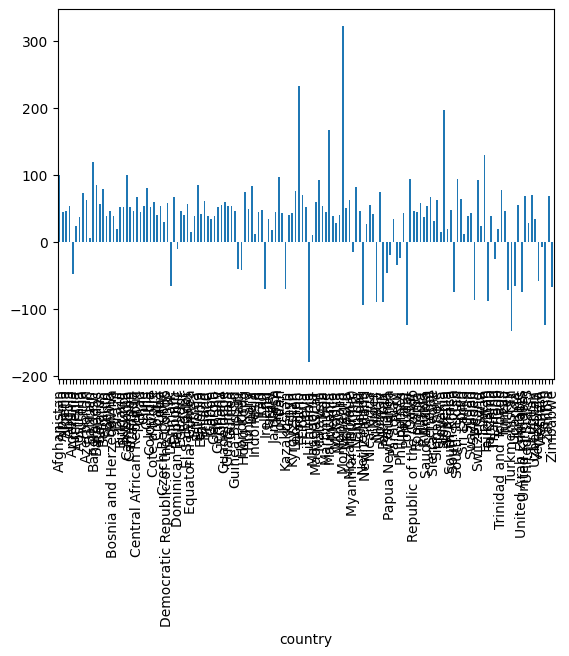

In [90]:
df.groupby(['country'])['profit'].mean().plot(kind='bar');

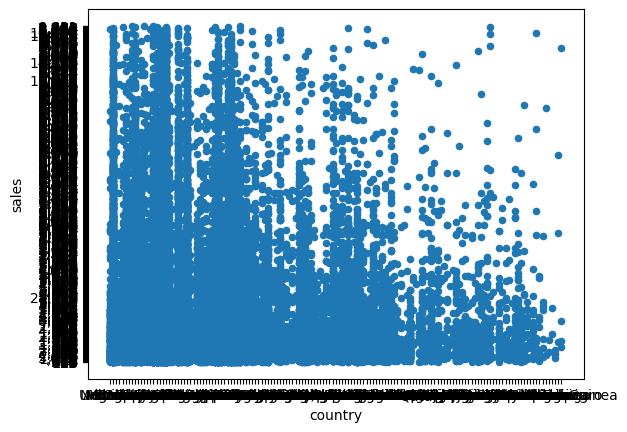

In [96]:
df.plot.scatter(x='country',y='sales');